<a href="https://colab.research.google.com/github/hubertrykala93/US_health_insurance_regression_prediction/blob/main/US_health_insurance_regression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [784]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, RANSACRegressor, SGDRegressor, Ridge, Lasso
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

np.set_printoptions(suppress=True, edgeitems=30, linewidth=100000,
                    formatter=dict(float=lambda x: f'{x:.8f}'))
np.random.seed(42)

sns.set()

pd.options.display.float_format = '{:,.8f}'.format
pd.set_option('display.width', 320)
pd.set_option('display.max_columns', 100)

In [785]:
path = '/content/insurance.csv'

In [786]:
raw_data = pd.read_csv(filepath_or_buffer=path)
data = raw_data.copy()

In [787]:
# Checking head of DataFrame
data.head(n=5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90000000,0,yes,southwest,"16,884.92400000"
1,18,male,33.77000000,1,no,southeast,"1,725.55230000"
2,28,male,33.00000000,3,no,southeast,"4,449.46200000"
3,33,male,22.70500000,0,no,northwest,"21,984.47061000"
4,32,male,28.88000000,0,no,northwest,"3,866.85520000"


In [788]:
# Basic information about numerical columns
data.describe()

,age,bmi,children,charges
count,"1,338.00000000","1,338.00000000","1,338.00000000","1,338.00000000"
mean,39.20702541,30.66339686,1.09491779,"13,270.42226514"
std,14.04996038,6.09818691,1.20549274,"12,110.01123669"
min,18.00000000,15.96000000,0.00000000,"1,121.87390000"
25%,27.00000000,26.29625000,0.00000000,"4,740.28715000"
50%,39.00000000,30.40000000,1.00000000,"9,382.03300000"
75%,51.00000000,34.69375000,2.00000000,"16,639.91251500"
max,64.00000000,53.13000000,5.00000000,"63,770.42801000"


In [789]:
# Basic information about DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [790]:
# How many null values in DataFrame?
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [791]:
# Checking duplicated rows
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59000000,0,no,northwest,"1,639.56310000"


In [792]:
# Removing duplicated rows
data.drop_duplicates(inplace=True)

Data Analysis

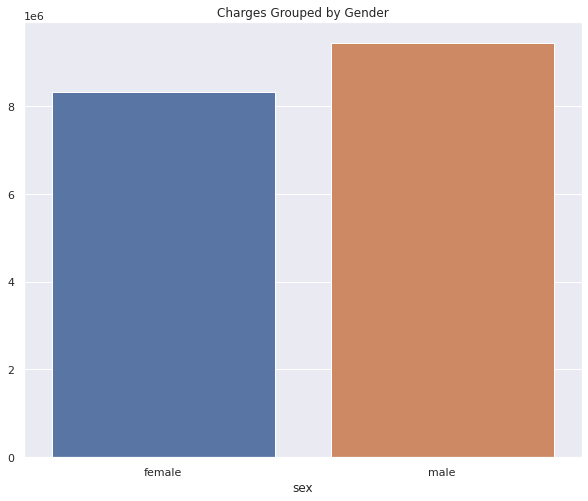

In [793]:
# Charges grouped by gender
plt.figure(figsize=(10, 8))
sns.barplot(data=data, x=data.groupby(by='sex', sort=True)['charges'].sum().index,
            y=data.groupby(by='sex', sort=True)['charges'].sum().values)
plt.title(label='Charges Grouped by Gender')
plt.show()

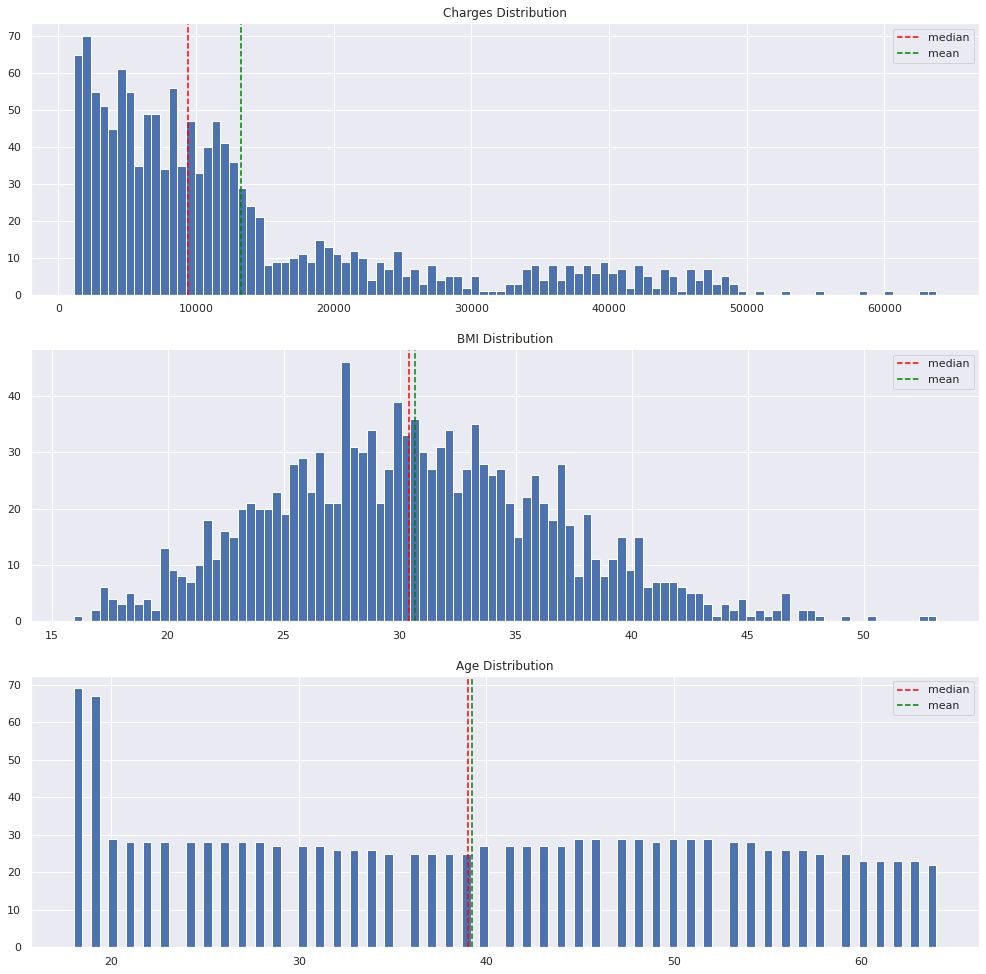

In [794]:
# Checking histograms for numerical columns
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(17, 17))
ax[0].hist(x=data['charges'], bins=100)
ax[0].axvline(x=data['charges'].median(), linestyle='--', color='red', label='median')
ax[0].axvline(x=data['charges'].mean(), linestyle='--', color='green', label='mean')
ax[0].set_title(label='Charges Distribution')
ax[0].legend(loc='best')
ax[1].hist(x=data['bmi'], bins=100)
ax[1].axvline(x=data['bmi'].median(), linestyle='--', color='red', label='median')
ax[1].axvline(x=data['bmi'].mean(), linestyle='--', color='green', label='mean')
ax[1].set_title(label='BMI Distribution')
ax[1].legend(loc='best')
ax[2].hist(x=data['age'], bins=100)
ax[2].axvline(x=data['age'].median(), linestyle='--', color='red', label='median')
ax[2].axvline(x=data['age'].mean(), linestyle='--', color='green', label='mean')
ax[2].set_title(label='Age Distribution')
ax[2].legend(loc='best')
plt.show()

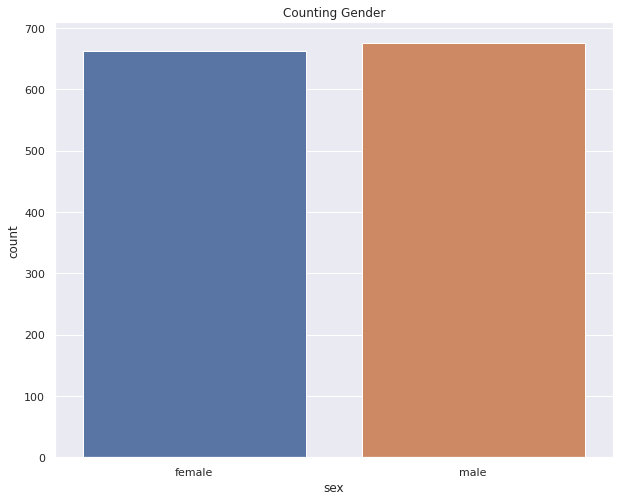

In [795]:
# Counting gender
plt.figure(figsize=(10, 8))
sns.countplot(x='sex', data=data)
plt.title(label='Counting Gender')
plt.show()

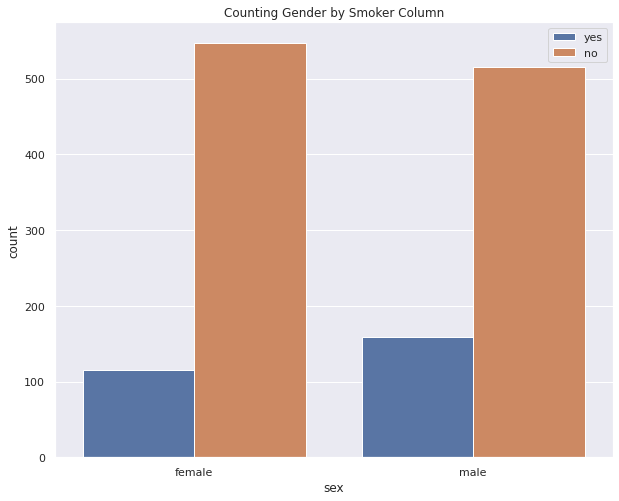

In [796]:
# Counting gender by smoker column
plt.figure(figsize=(10, 8))
sns.countplot(x='sex', data=data, hue='smoker')
plt.title(label='Counting Gender by Smoker Column')
plt.legend(loc='best')
plt.show()

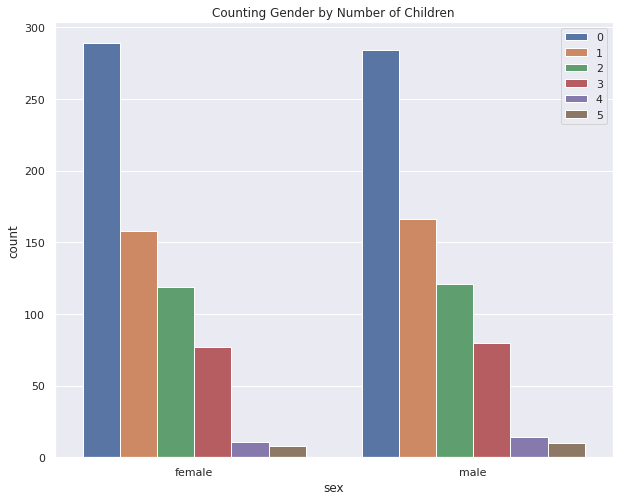

In [797]:
# Counting gender by smoker column and number of children
plt.figure(figsize=(10, 8))
sns.countplot(x='sex', data=data, hue='children')
plt.title(label='Counting Gender by Number of Children')
plt.legend(loc='best')
plt.show()

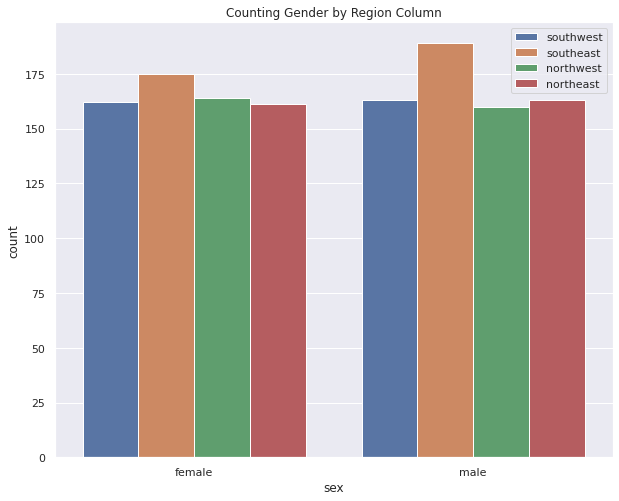

In [798]:
# Counting gender by region
plt.figure(figsize=(10, 8))
sns.countplot(x='sex', data=data, hue='region')
plt.title(label='Counting Gender by Region Column')
plt.legend(loc='best')
plt.show()

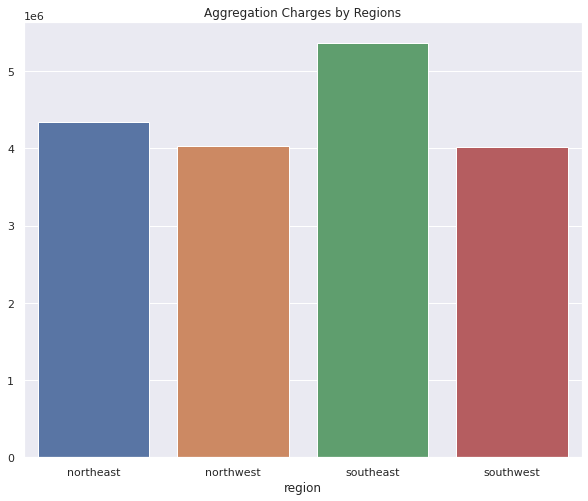

In [799]:
# Aggregation charges by regions
plt.figure(figsize=(10, 8))
sns.barplot(data=data, x=data.groupby(by='region')['charges'].sum().index,
            y=data.groupby(by='region')['charges'].sum().values)
plt.title(label='Aggregation Charges by Regions')
plt.show()

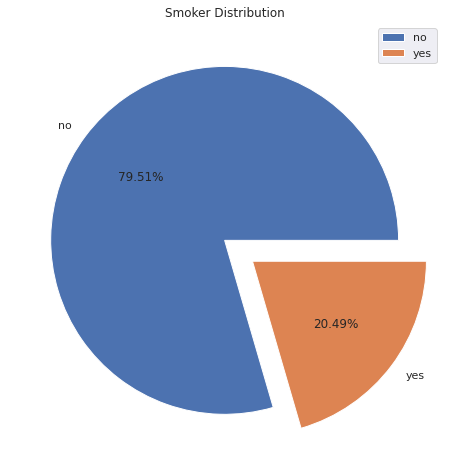

In [800]:
# Smoker distribution
plt.figure(figsize=(10, 8))
plt.pie(x=data['smoker'].value_counts().values, labels=data['smoker'].value_counts().index,
        autopct='%.2f%%', explode=(0, 0.2))
plt.title(label='Smoker Distribution')
plt.legend(loc='best')
plt.show()

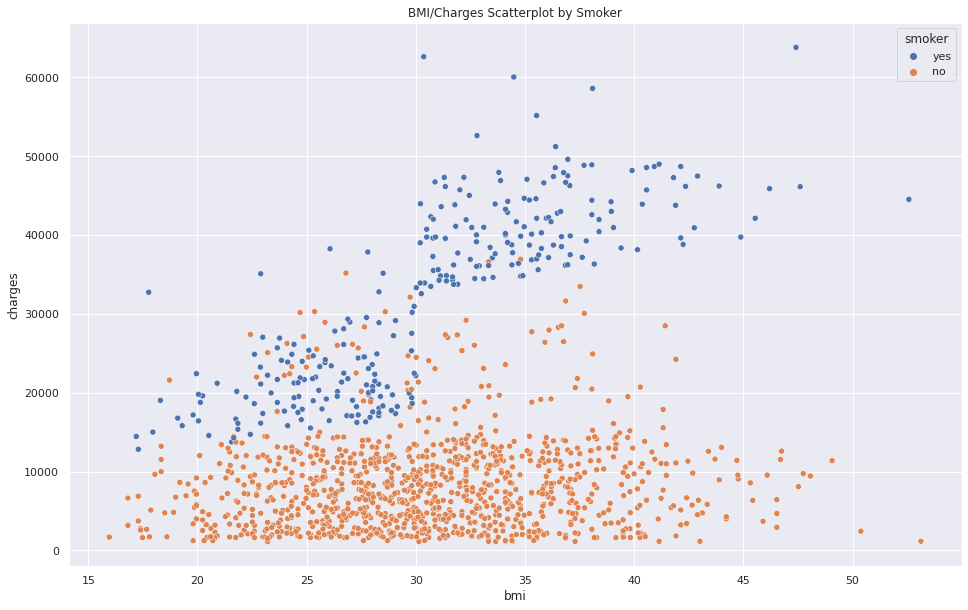

In [801]:
# BMI/Charges scatterplot by smoker
plt.figure(figsize=(16, 10))
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker')
plt.title(label='BMI/Charges Scatterplot by Smoker')
plt.show()

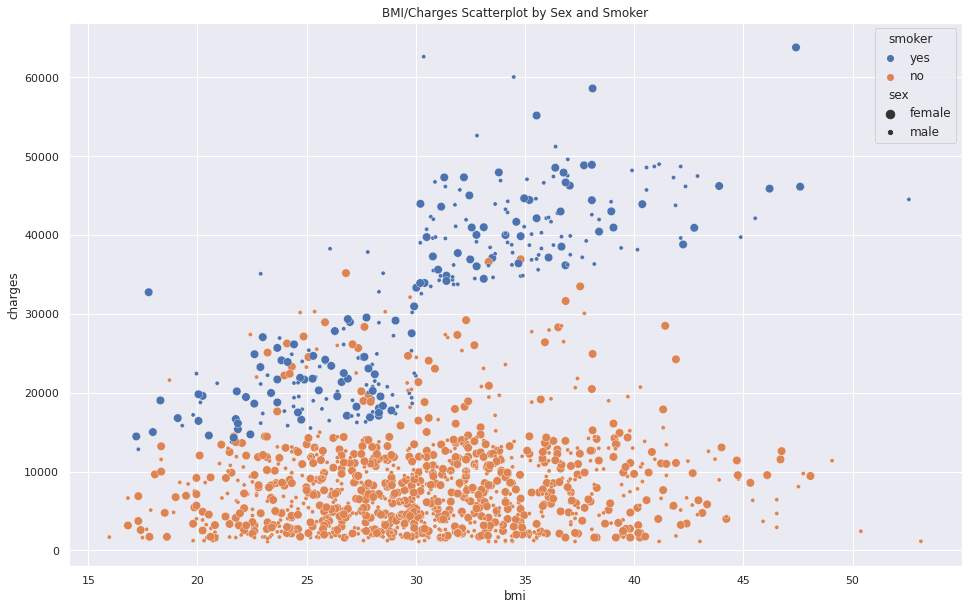

In [802]:
# BMI/Charges Scatterplot by Sex and Smoker
plt.figure(figsize=(16, 10))
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker', size='sex')
plt.title(label='BMI/Charges Scatterplot by Sex and Smoker')
plt.show()

Data Preprocessing

In [803]:
# Creating Auxiliary Columns
data['bmi_degree'] = data['bmi'].apply(
    func=lambda
        x: 'starvation' if (x < 17) else 'underweight' if (
            x > 17 and x <= 18.49) else 'correct' if (
            x > 18.50 and x <= 24.99) else 'overweight' if (
            x > 25 and x <= 29.99) else 'first degree of obesity' if (
            x > 30 and x <= 34.99) else 'second degree of obesity' if (
            x > 35 and x < 39.9) else 'extreme obesity')

data['life_stages'] = data['age'].apply(func=lambda x: 'infancy' if (
    x > 0 and x <= 2) else 'early childhood' if (
    x > 2 and x <= 5) else 'first middle childhood' if (
    x > 5 and x <= 8) else 'second middle childhood' if (
    x > 8 and x <= 13) else 'early adolescence' if (
    x > 13 and x <= 18) else 'late adolescence' if (
    x > 18 and x <= 23) else 'early adulthood' if (
    x > 23 and x <= 35) else 'middle adulthood' if (
    x > 35 and x <= 61) else 'late adulthood')

data['has_children'] = data['children'].apply(func=lambda x: 'no' if x == 0 else 'yes')

In [804]:
data.head(n=5)

,age,sex,bmi,children,smoker,region,charges,bmi_degree,life_stages,has_children
0,19,female,27.90000000,0,yes,southwest,"16,884.92400000",overweight,late adolescence,no
1,18,male,33.77000000,1,no,southeast,"1,725.55230000",first degree of obesity,early adolescence,yes
2,28,male,33.00000000,3,no,southeast,"4,449.46200000",first degree of obesity,early adulthood,yes
3,33,male,22.70500000,0,no,northwest,"21,984.47061000",correct,early adulthood,no
4,32,male,28.88000000,0,no,northwest,"3,866.85520000",overweight,early adulthood,no


In [805]:
# Encoding categorical variables with Ordinal Encoder
for column in data.columns:
    if data[column].dtype == 'object':
        encoder = OrdinalEncoder()
        data[column] = encoder.fit_transform(X=data[[column]])

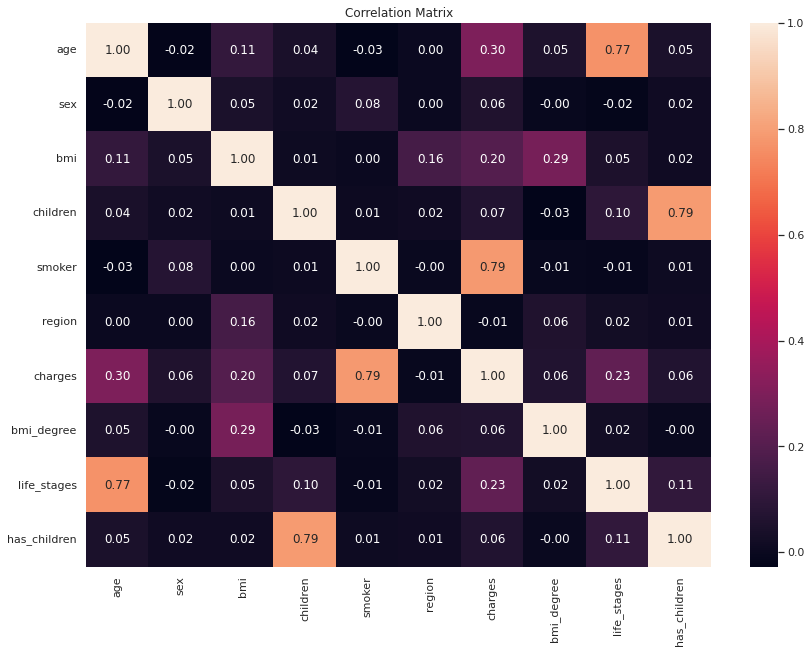

In [806]:
# Correlation Matrix visualization
plt.figure(figsize=(14, 10))
sns.heatmap(data=data.corr(), annot=True, fmt='.2f')
plt.title(label='Correlation Matrix')
plt.show()

In [807]:
# Converting some types of columns to categorical integer
data['children'] = data['children'].astype(dtype='int')
data['sex'] = data['sex'].astype(dtype='int')
data['smoker'] = data['smoker'].astype(dtype='int')
data['region'] = data['region'].astype(dtype='int')
data['bmi_degree'] = data['bmi_degree'].astype(dtype='int')
data['life_stages'] = data['life_stages'].astype(dtype='int')
data['has_children'] = data['has_children'].astype(dtype='int')

Define X and y

In [808]:
# Making X and y
X = data.drop(columns='charges')
y = data['charges']

In [809]:
# Train and test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [810]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (935, 9)
X_test shape: (402, 9)
y_train shape: (935,)
y_test shape: (402,)


In [811]:
# Scaling X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X=X_train)
X_test = scaler.transform(X=X_test)

In [812]:
# Creating DataFrame with models and statistics to find out the best model
models_list = []

models_list.append([LinearRegression(), RANSACRegressor(), SGDRegressor(),
                    Ridge(), Lasso(), LinearSVR(), SVR(), KNeighborsRegressor(),
                    DecisionTreeRegressor(), RandomForestRegressor(),
                    GradientBoostingRegressor(), AdaBoostRegressor(),
                    GaussianProcessRegressor()])

def regression_models_scores(y_test, models_list: list,
                  is_plot_visible=False):
    """
    Searching the best prediction model from the list and results visualization
    on bar chart and DataFrame.
    :param y_test: numpy.ndarray
    :param models_list: list
    :param is_plot_visible: boolean
    :return: pandas.DataFrame, seaborn.barplot
    """

    r2_scores = []
    mae = []
    mse = []

    for model in models_list[0]:
        classifier = model
        classifier.fit(X=X_train, y=y_train)
        y_pred = classifier.predict(X=X_test)

        r2_scores.append(r2_score(y_true=y_test, y_pred=y_pred))
        mae.append(mean_absolute_error(y_true=y_test, y_pred=y_pred))
        mse.append(mean_squared_error(y_true=y_test, y_pred=y_pred))

    names = [str(model)[:str(model).index('(')] for model in models_list[0]]

    results = pd.DataFrame(data={
        'name': names,
        'r2_scores': r2_scores,
        'mae': mae,
        'mse': mse,
    })

    if is_plot_visible:
        plt.figure(figsize=(12, 8))
        sns.barplot(x=r2_scores, y=names,
                    orient='h')
        plt.show()

    return results.sort_values(by='r2_scores', ascending=False).reset_index(drop=True)

In [813]:
regression_models_scores(y_test=y_test, models_list=models_list, is_plot_visible=False)

,name,r2_scores,mae,mse
0,GradientBoostingRegressor,0.87161930,"2,594.78751016","21,968,210.94511278"
1,RandomForestRegressor,0.86433507,"2,639.77764685","23,214,672.60247768"
2,AdaBoostRegressor,0.84663236,"4,038.20238801","26,243,918.58042734"
3,KNeighborsRegressor,0.79629560,"3,620.81092319","34,857,430.53417678"
4,DecisionTreeRegressor,0.78542503,"2,743.26916980","36,717,576.31662470"
5,LinearRegression,0.77171405,"4,192.08339306","39,063,768.37104125"
6,Lasso,0.77169767,"4,192.04550188","39,066,572.08537684"
7,Ridge,0.77151492,"4,194.59351280","39,097,842.64782708"
8,SGDRegressor,0.77077826,"4,213.38056639","39,223,898.29702436"
9,RANSACRegressor,0.52469707,"4,282.21878872","81,332,747.96857296"


Define model

In [814]:
# Creating GradientBoostingRegressor
model = GradientBoostingRegressor()

In [815]:
# Find out the best params for model using GridSearchCV
params = {'learning_rate': [0.01, 0.02, 0.03, 0.04],
          'subsample': [0.9, 0.5, 0.2, 0.1],
          "min_samples_split": [5],
          'n_estimators': [100, 150, 200, 500, 1000],
          'max_depth': [4]
          }

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X=X_train, y=y_train)
y_pred = grid_search.predict(X=X_test)

In [816]:
# GridSearch the best params
grid_search.best_params_

{'learning_rate': 0.02,
 'max_depth': 4,
 'min_samples_split': 5,
 'n_estimators': 150,
 'subsample': 0.9}

In [817]:
# r2 score result
r2_score = r2_score(y_true=y_test, y_pred=y_pred)
print(f'R2_score: {r2_score}')

R2_score: 0.8720603121330104


In [818]:
# Creating DataFrame with True and Predicted values
prediction_results = pd.DataFrame(data={
    'True': y_test,
    'Predicted': y_pred,
    'Error': y_test - y_pred
}).reset_index(drop=True)

In [819]:
prediction_results

,True,Predicted,Error
0,"8,688.85885000","10,237.24653288","-1,548.38768288"
1,"5,708.86700000","7,178.53135387","-1,469.66435387"
2,"11,436.73815000","12,855.16942850","-1,418.43127850"
3,"38,746.35510000","42,304.38942182","-3,558.03432182"
4,"4,463.20510000","5,947.85252522","-1,484.64742522"
...,...,...,...
397,"5,148.55260000","6,369.69545740","-1,221.14285740"
398,"11,363.28320000","12,660.09320034","-1,296.81000034"
399,"10,600.54830000","11,728.04604565","-1,127.49774565"
400,"13,429.03540000","14,155.28524452",-726.24984452


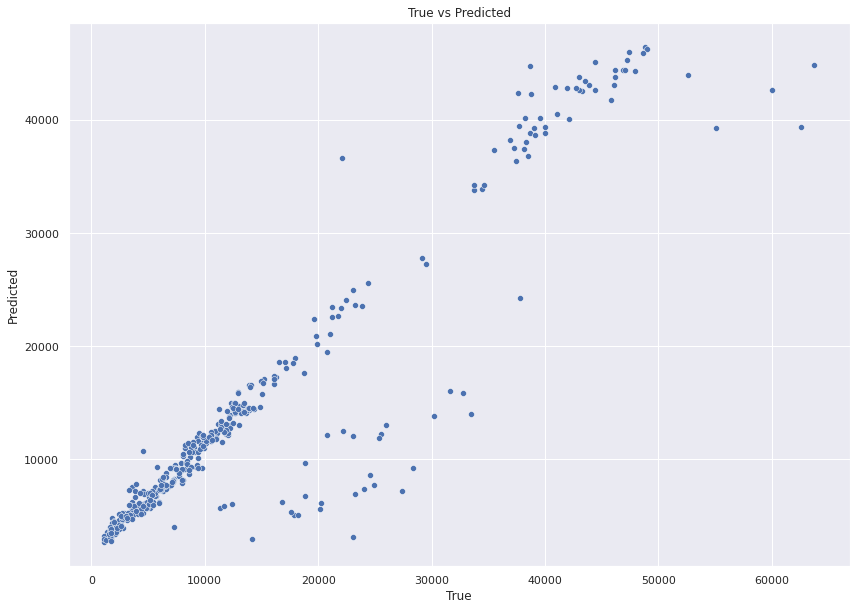

In [820]:
# Scatterplot with True vs Predicted values
plt.figure(figsize=(14, 10))
sns.scatterplot(data=prediction_results, x='True', y='Predicted')
plt.xlabel(xlabel='True')
plt.ylabel(ylabel='Predicted')
plt.title(label='True vs Predicted')
plt.show()

In [821]:
# Save results to csv file
prediction_results.to_csv(path_or_buf='/content/prediction_results.csv')